In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


We can clearly see that the shape of the traiing and testing set is 3D numpy array

In [ ]:
print("Training set X", X_train.shape)
print("Test set X", X_test.shape)

Training set (60000, 28, 28)
Test set (10000, 28, 28)


In [ ]:
print("Training set Y", y_train.shape)
print("Test set Y", y_test.shape)

Training set Y (60000,)
Test set Y (10000,)


Let's look at the Y value that is target values of our data set:

In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


So it bascially tells us that the 1st image is of letter 5 then next one is 0, then 4 and so on....

#Visualisation
Now let's diplay any image from the data set:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

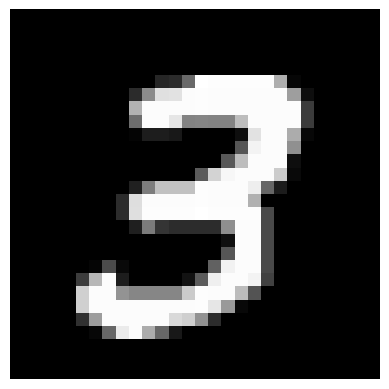

In [ ]:
plt.imshow(X_train[7], cmap ='gray') # image at the 7th index in the training set is of 3.
plt.axis('off')
plt.show()

We need to reduce the pixel value of each images in the range of (0 - 1). Thus dividing each value in the matrix by 255.

0   --> Black

255 --> White

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print(X_train[0])

# ANN architecture
Now its the time to flatten the data i.e image pixels.
In our data set each image is in form of 28,28 matrix of varying pixels. So we need to convert this matrix into a single vector of size 28 * 28 i.e 784 sized vector.

In [ ]:
model = Sequential([
    Flatten(input_shape = (28,28)),  # converting the higher dimensional array to 1D
    Dense(128, activation ='relu'),
    Dense(64, activation ='relu'),
    Dense(10, activation ='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])

# Training The Model

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, validation_split= 0.2)

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2751 - accuracy: 0.9199 - val_loss: 0.1389 - val_accuracy: 0.9579
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1171 - accuracy: 0.9646 - val_loss: 0.1101 - val_accuracy: 0.9689
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0797 - accuracy: 0.9758 - val_loss: 0.1040 - val_accuracy: 0.9682
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.1019 - val_accuracy: 0.9695
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0996 - val_accuracy: 0.9735
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0359 - accuracy: 0.9881 - val_loss: 0.0999 - val_accuracy: 0.9750
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0979 - val_accuracy:

# Making predictions


The values in each row represent the model's confidence scores or probabilities assigned to each class. These scores are typically obtained by passing the output of the neural network through a softmax activation function, which ensures that the scores sum up to 1, thus representing probabilities.

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Each row cinatains 10 confidence scores for each digit from 0  - 9.

In [ ]:
y_prob[1]

array([4.6719382e-27, 7.7710161e-20, 9.9999994e-01, 5.9235184e-30,
       0.0000000e+00, 2.2094537e-34, 1.9979903e-31, 9.5922958e-36,
       2.1269497e-36, 0.0000000e+00], dtype=float32)

We need to see which digit has the highest confidence score of being same as that of in image.

In [ ]:
y_predicted = y_prob.argmax(axis = 1) #argmax function selects the number with highest probability

In [ ]:
y_predicted[:10] # predicted values by the model

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
y_test[:10] # actual target values

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

# Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_predicted)
print("The model accuracy is : ", model_accuracy)

The model accuracy is :  0.98


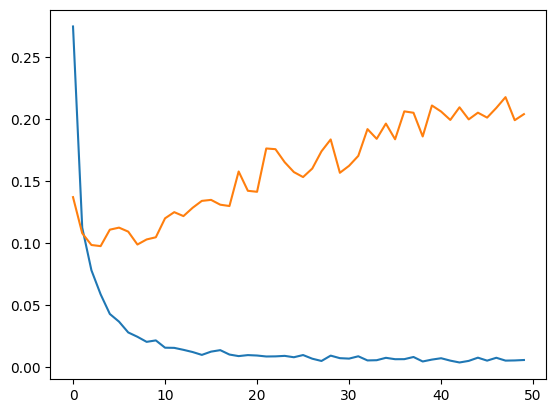

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

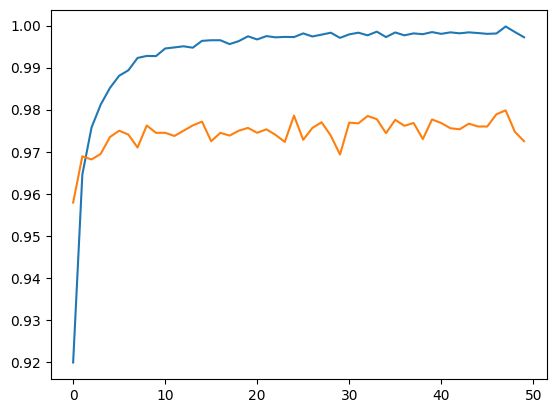

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Predict on a raw image

In [ ]:
from PIL import Image

In [ ]:
# Load your image:
image_path = "/content/3.png"
image = Image.open(image_path)

In [ ]:
# Preprocess the image:
image = image.resize((28, 28))  # Resize to 28x28 pixels
image = image.convert('L')       # Convert to grayscale
image_array = np.array(image)   # Convert image to numpy array
image_array = image_array / 255.0  # Normalize pixel values

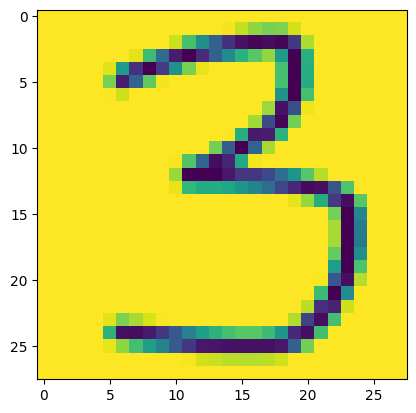

In [ ]:
plt.imshow(image_array)

In [ ]:
# Reshape the image
image_array = image_array.reshape(1, 28, 28)

In [ ]:
# Make predictions
prediction = model.predict(image_array).argmax(axis=1)
print("The digit in the image is:", prediction)